In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [36]:
df = pd.read_csv('student_habits_performance.csv')

In [37]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [38]:
df.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [39]:
df.columns = df.columns.str.strip()
df.drop(columns=['student_id'],inplace=True)
print(df['gender'].unique())
print(df['part_time_job'].unique())
col_list=df.columns.tolist()
print(col_list)

['Female' 'Male' 'Other']
['No' 'Yes']
['age', 'gender', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'part_time_job', 'attendance_percentage', 'sleep_hours', 'diet_quality', 'exercise_frequency', 'parental_education_level', 'internet_quality', 'mental_health_rating', 'extracurricular_participation', 'exam_score']


In [40]:
df['parental_education_level'] = df['parental_education_level'].fillna('no_education')

In [41]:
print(df.shape)
df.sample(5)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df.drop(columns=['exam_score']),df['exam_score'],test_size=0.2,random_state=3)


(1000, 15)


In [42]:
df.sample(5)

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
331,17,Male,7.3,1.7,1.6,No,79.5,7.7,Fair,6,no_education,Average,2,Yes,100.0
504,23,Female,5.4,3.1,3.1,No,79.0,4.2,Fair,1,Bachelor,Good,4,No,77.9
968,22,Female,4.6,2.6,1.0,No,76.1,6.1,Good,3,High School,Average,4,No,74.6
606,23,Male,6.8,2.5,0.7,No,97.2,4.4,Good,1,Bachelor,Poor,4,No,93.1
802,17,Male,4.3,1.9,1.9,No,78.7,10.0,Fair,4,no_education,Good,2,No,82.9


In [43]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = df.select_dtypes(exclude=['object', 'category']).columns.tolist()
numerical_features.remove('exam_score')
print(categorical_features)
print(numerical_features)

['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation']
['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating']


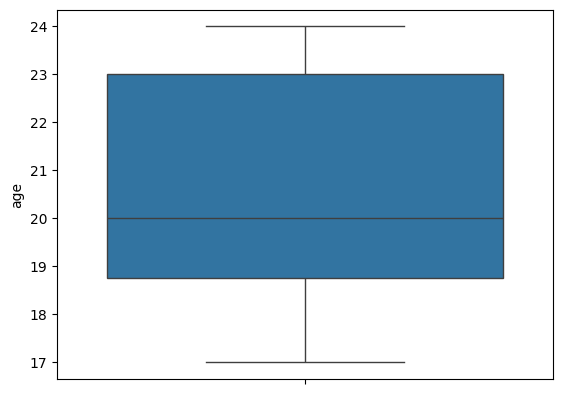

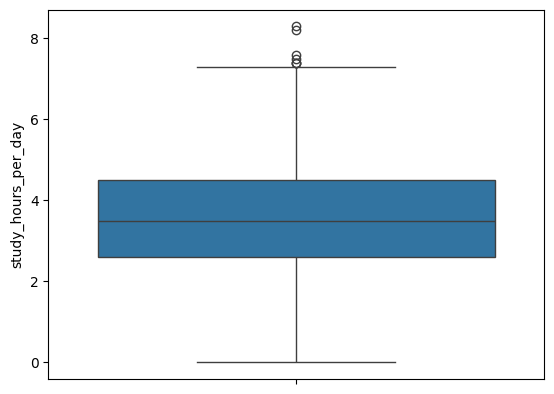

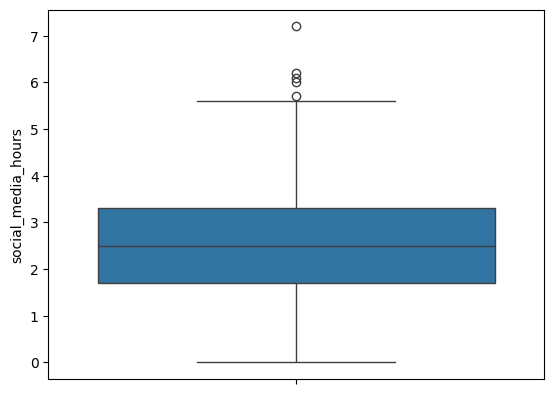

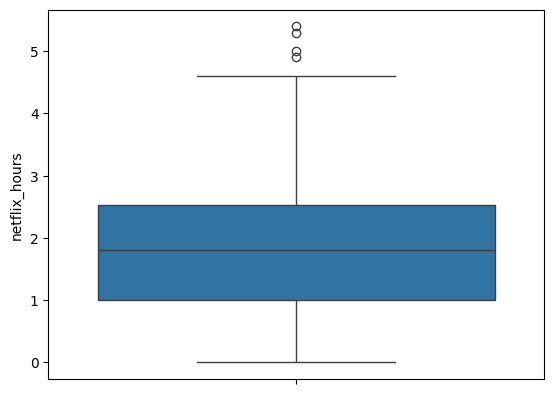

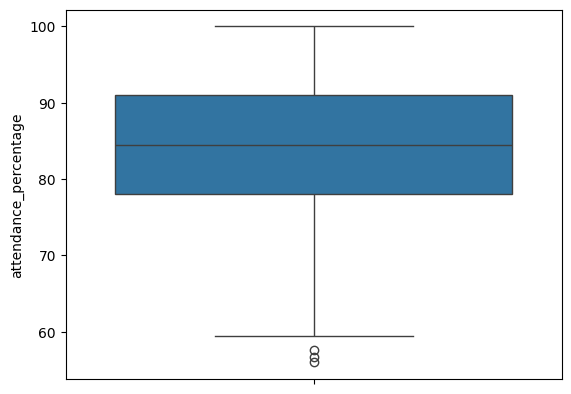

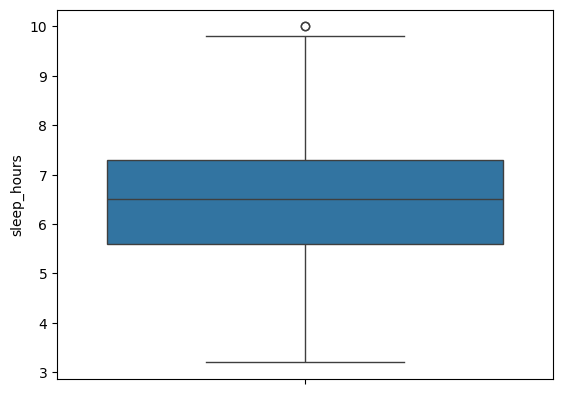

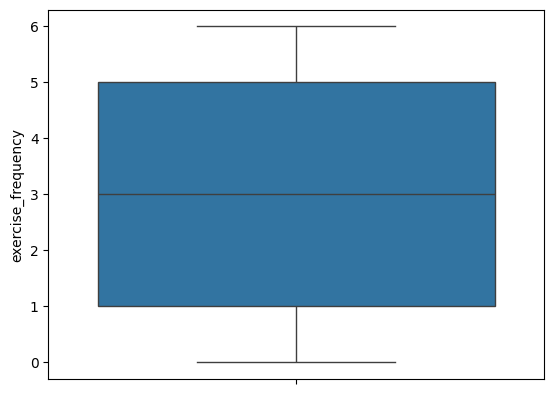

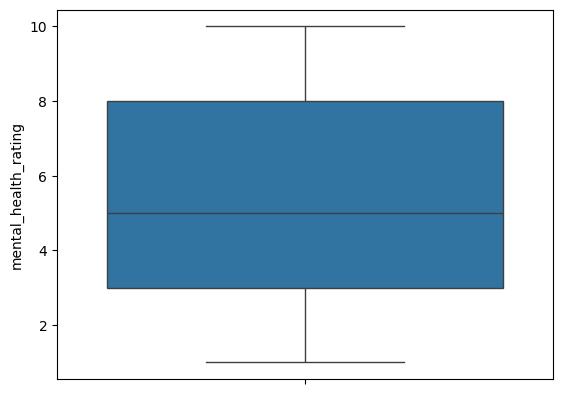

In [44]:
for col in numerical_features:
  sns.boxplot(df[col])
  plt.show()

In [45]:
for col in numerical_features:
  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)

  iqr=q3-q1
  lower=q1-1.5*iqr
  higher=q3+1.5*iqr

  df=df[(df[col]>=lower) & (df[col]<=higher)]

In [46]:
df.shape

(979, 15)

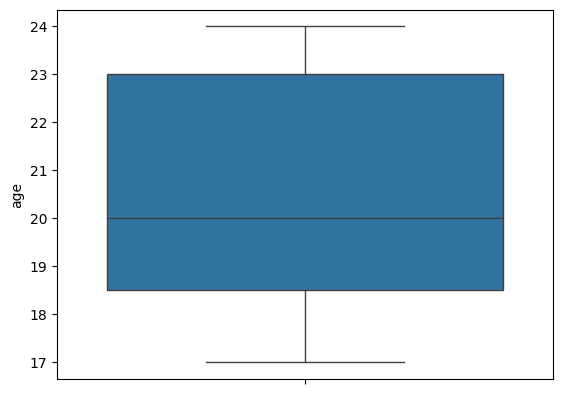

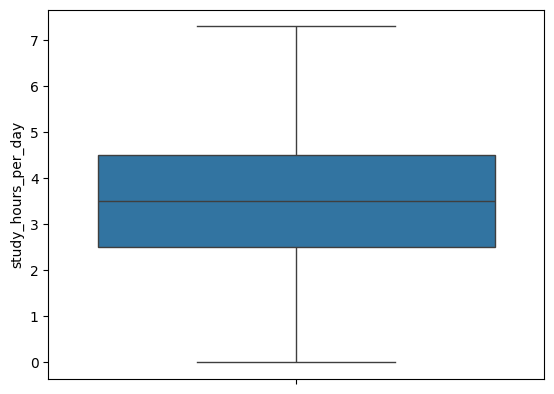

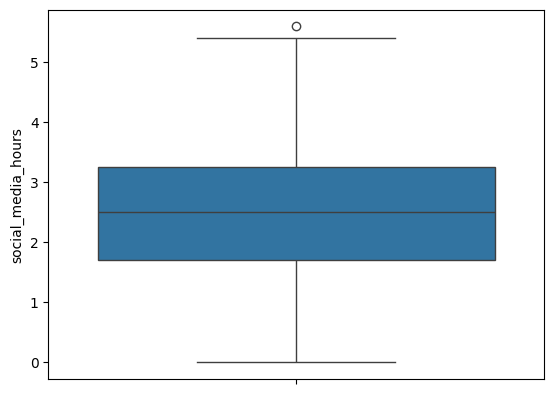

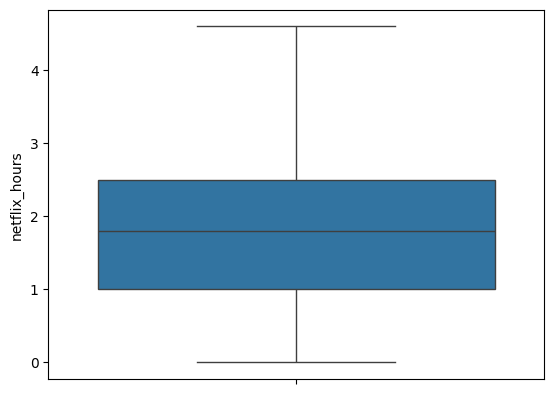

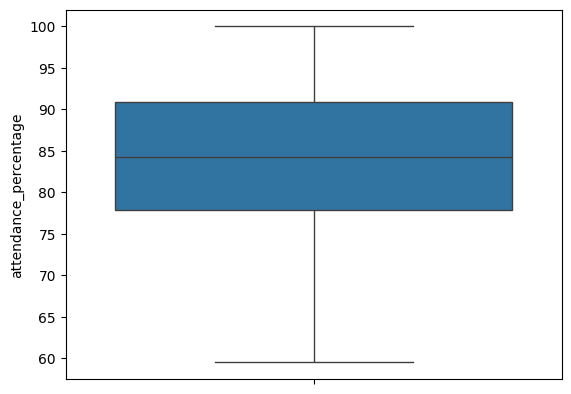

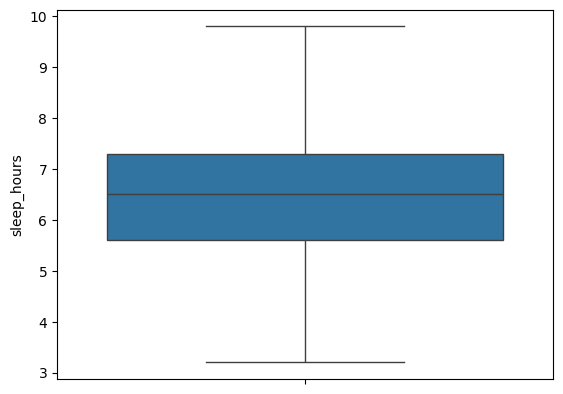

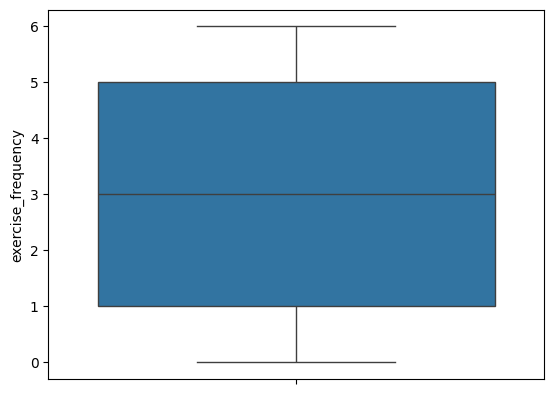

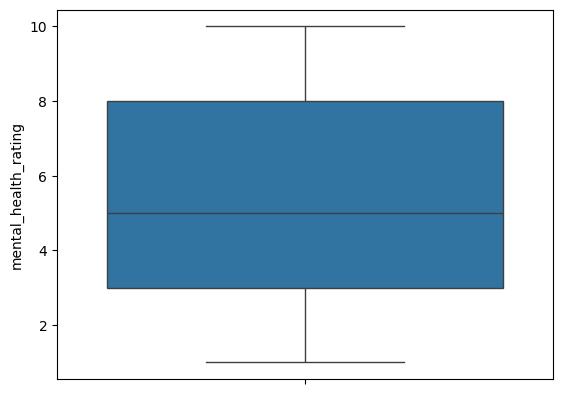

In [47]:
for col in numerical_features:
  sns.boxplot(df[col])
  plt.show()

In [48]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

# df.columns = df.columns.str.strip()

trf1=ColumnTransformer([
   ('ohe',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),['gender','part_time_job','internet_quality','extracurricular_participation']),

  ('ordinalencoding',OrdinalEncoder(categories=[
                                    ['Poor','Fair','Good'],
                                    ['no_education','High School','Bachelor','Master']
  ])
,['diet_quality','parental_education_level']),

('standardize',StandardScaler(),numerical_features)
], remainder='passthrough')


this is for linear regression...........

In [49]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# rid=Ridge(alpha=1.0)

# las=Lasso(alpha=0.1)

pipe2=Pipeline([
  ('trf1',trf1),
  ('poly-features',PolynomialFeatures(degree=2)),
  ('regressor',Lasso())
])

In [50]:
param_grid = {
    "regressor__alpha": [0.001, 0.01, 0.1, 1.0, 10.0],
    "regressor__max_iter": [1000, 5000]
}

In [51]:
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [52]:
grid_search = GridSearchCV(
    pipe2, param_grid, cv=5, scoring="r2", n_jobs=1
)
grid_search.fit(X_train, Y_train)

# 7. Evaluate
y_pred = grid_search.predict(X_test)
print("Best params:", grid_search.best_params_)
print("R²:", r2_score(Y_test, y_pred))
print("MAE:", mean_absolute_error(Y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, y_pred)))

Best params: {'regressor__alpha': 0.1, 'regressor__max_iter': 1000}
R²: 0.9062006605345881
MAE: 4.259982065819076
RMSE: 5.290063921590442


In [53]:
import joblib

# Save the trained pipeline to a .pkl file
joblib.dump(grid_search, 'model/habits_vs_marks_pipeline.pkl')


['model/habits_vs_marks_pipeline.pkl']